# Simple image processing using MNIST dataset and Keras

This is a simple beginner's reference code that performs training, testing and predicting values of hand-written numbers using Keras. The dataset used is MNIST which is very popular example as a stepping stone to image processing with Machine Learning.

### Summery of the contents
* Loading the dataset
* Obtaining a sample and preprocessing the data for the model
* Building the model
* Trainign the model with the data
* Evaluating the accuracy
* Using the trained model to predict images

In [1]:
# Importing the needed modules

from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

c:\users\miranthaj\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
# Loading the data from mnist module

(train_x, train_y) , (test_x, test_y) = mnist.load_data()

In [22]:
train_x.shape # We can see that train_x contains 6000 28x28 pixel images

(60000, 28, 28)

In [23]:
train_y.shape # And train_y contains 6000 characters

(60000,)

In [24]:
test_x.shape #test_x is also in the same shape as train_x otherthan it has only 1000 entries

(10000, 28, 28)

In [25]:
train_y # We can see that these 6000 characters are digits from 0-9. These are the labels of the images

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Note

We are going to perform a simple Sequential Neural Network using Keras on this data. To do this the data should be in a way that can be fed into the model. So we will make the data ready for this purpose starting with the train_x and test_x first.

As we know the train_x and test_x are both in the shape 6000x28x28. The image is 2D which has to made into 1D to be fed in. So we accomplish this using the reshape function.

In [26]:
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

And when it comes to the train_y and test_y sets, the data has to be categorized so it can be fed in to the model. A preliminary way of encoding data into categories in ML is known as one-hot-encoding. An explaination for this can be found [here](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

Luckily Keras has a built in function to perform this for us

In [27]:
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

### Now we're going to build our model

In [29]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

Here we perform three layers of regression and activation, activation of the first two layer being relu and the activation of the last layer being softmax.
It is important to choose softmax for the last layer here as it is categorical classification we're performing rather than binary classification.

In [30]:
#Compile the model as below
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

## All set! Let's train it.

In [31]:
model.fit(train_x,train_y,batch_size=32,epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 4.6895 - acc: 0.6959
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 1.4539 - acc: 0.9006
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 1.1225 - acc: 0.9230
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.9251 - acc: 0.9358
Epoch 5/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.8348 - acc: 0.9425
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.7527 - acc: 0.9478
Epoch 7/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.6900 - acc: 0.9516
Epoch 8/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.6404 - acc: 0.9553
Epoch 9/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.5831 - acc: 0.9594
Epoch 10/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.5445 - acc: 0.9617

Now we can evaluate if the trained model is working well by feeding in the test_x data and comparing the results with the train_y 

In [32]:
accuracy = model.evaluate(x=train_x,y=train_y,batch_size=32)

60000/60000 [==============================] - 2s 27us/step


In [33]:
print(accuracy)

[0.4896985864801599, 0.9655]


### As we can see we got over 96% accuracy even with this simple model which is quite good

Now let's just randomly shoot the model with image and see if it can predict the digit in the picture.

In [39]:
img = test_x[632] # get the 632nd picture
test_img = img.reshape((1,784))

img_class = model.predict_classes(test_img) # Feed it in the predict function

prediction = img_class[0]

print(prediction)

2


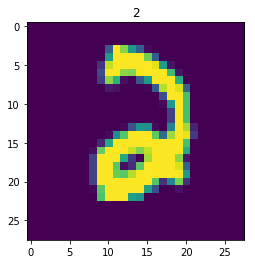

In [40]:
# Let's visualize the predictions to verify

import matplotlib.pyplot as plt
%matplotlib inline

img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

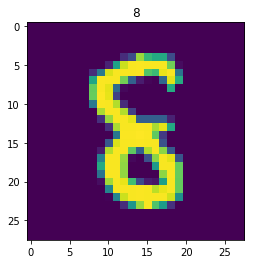

In [41]:
#Let try some more examples

img = test_x[232]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

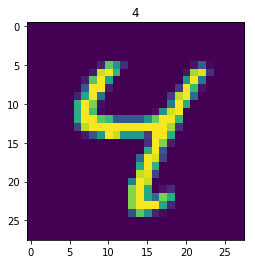

In [42]:
img = test_x[6]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

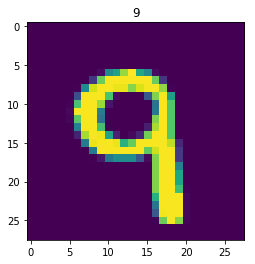

In [43]:
img = test_x[599]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

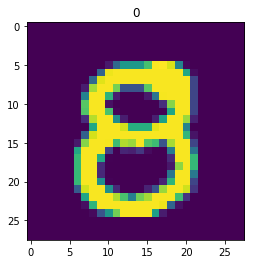

In [44]:
img = test_x[5569]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img) # Feed it in the predict function
prediction = img_class[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()

### Oh! See the code getting it wrong here! 

We can't afford to have this!

### Next we'll see how we can avoid these with altering our techniques